# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built                   16

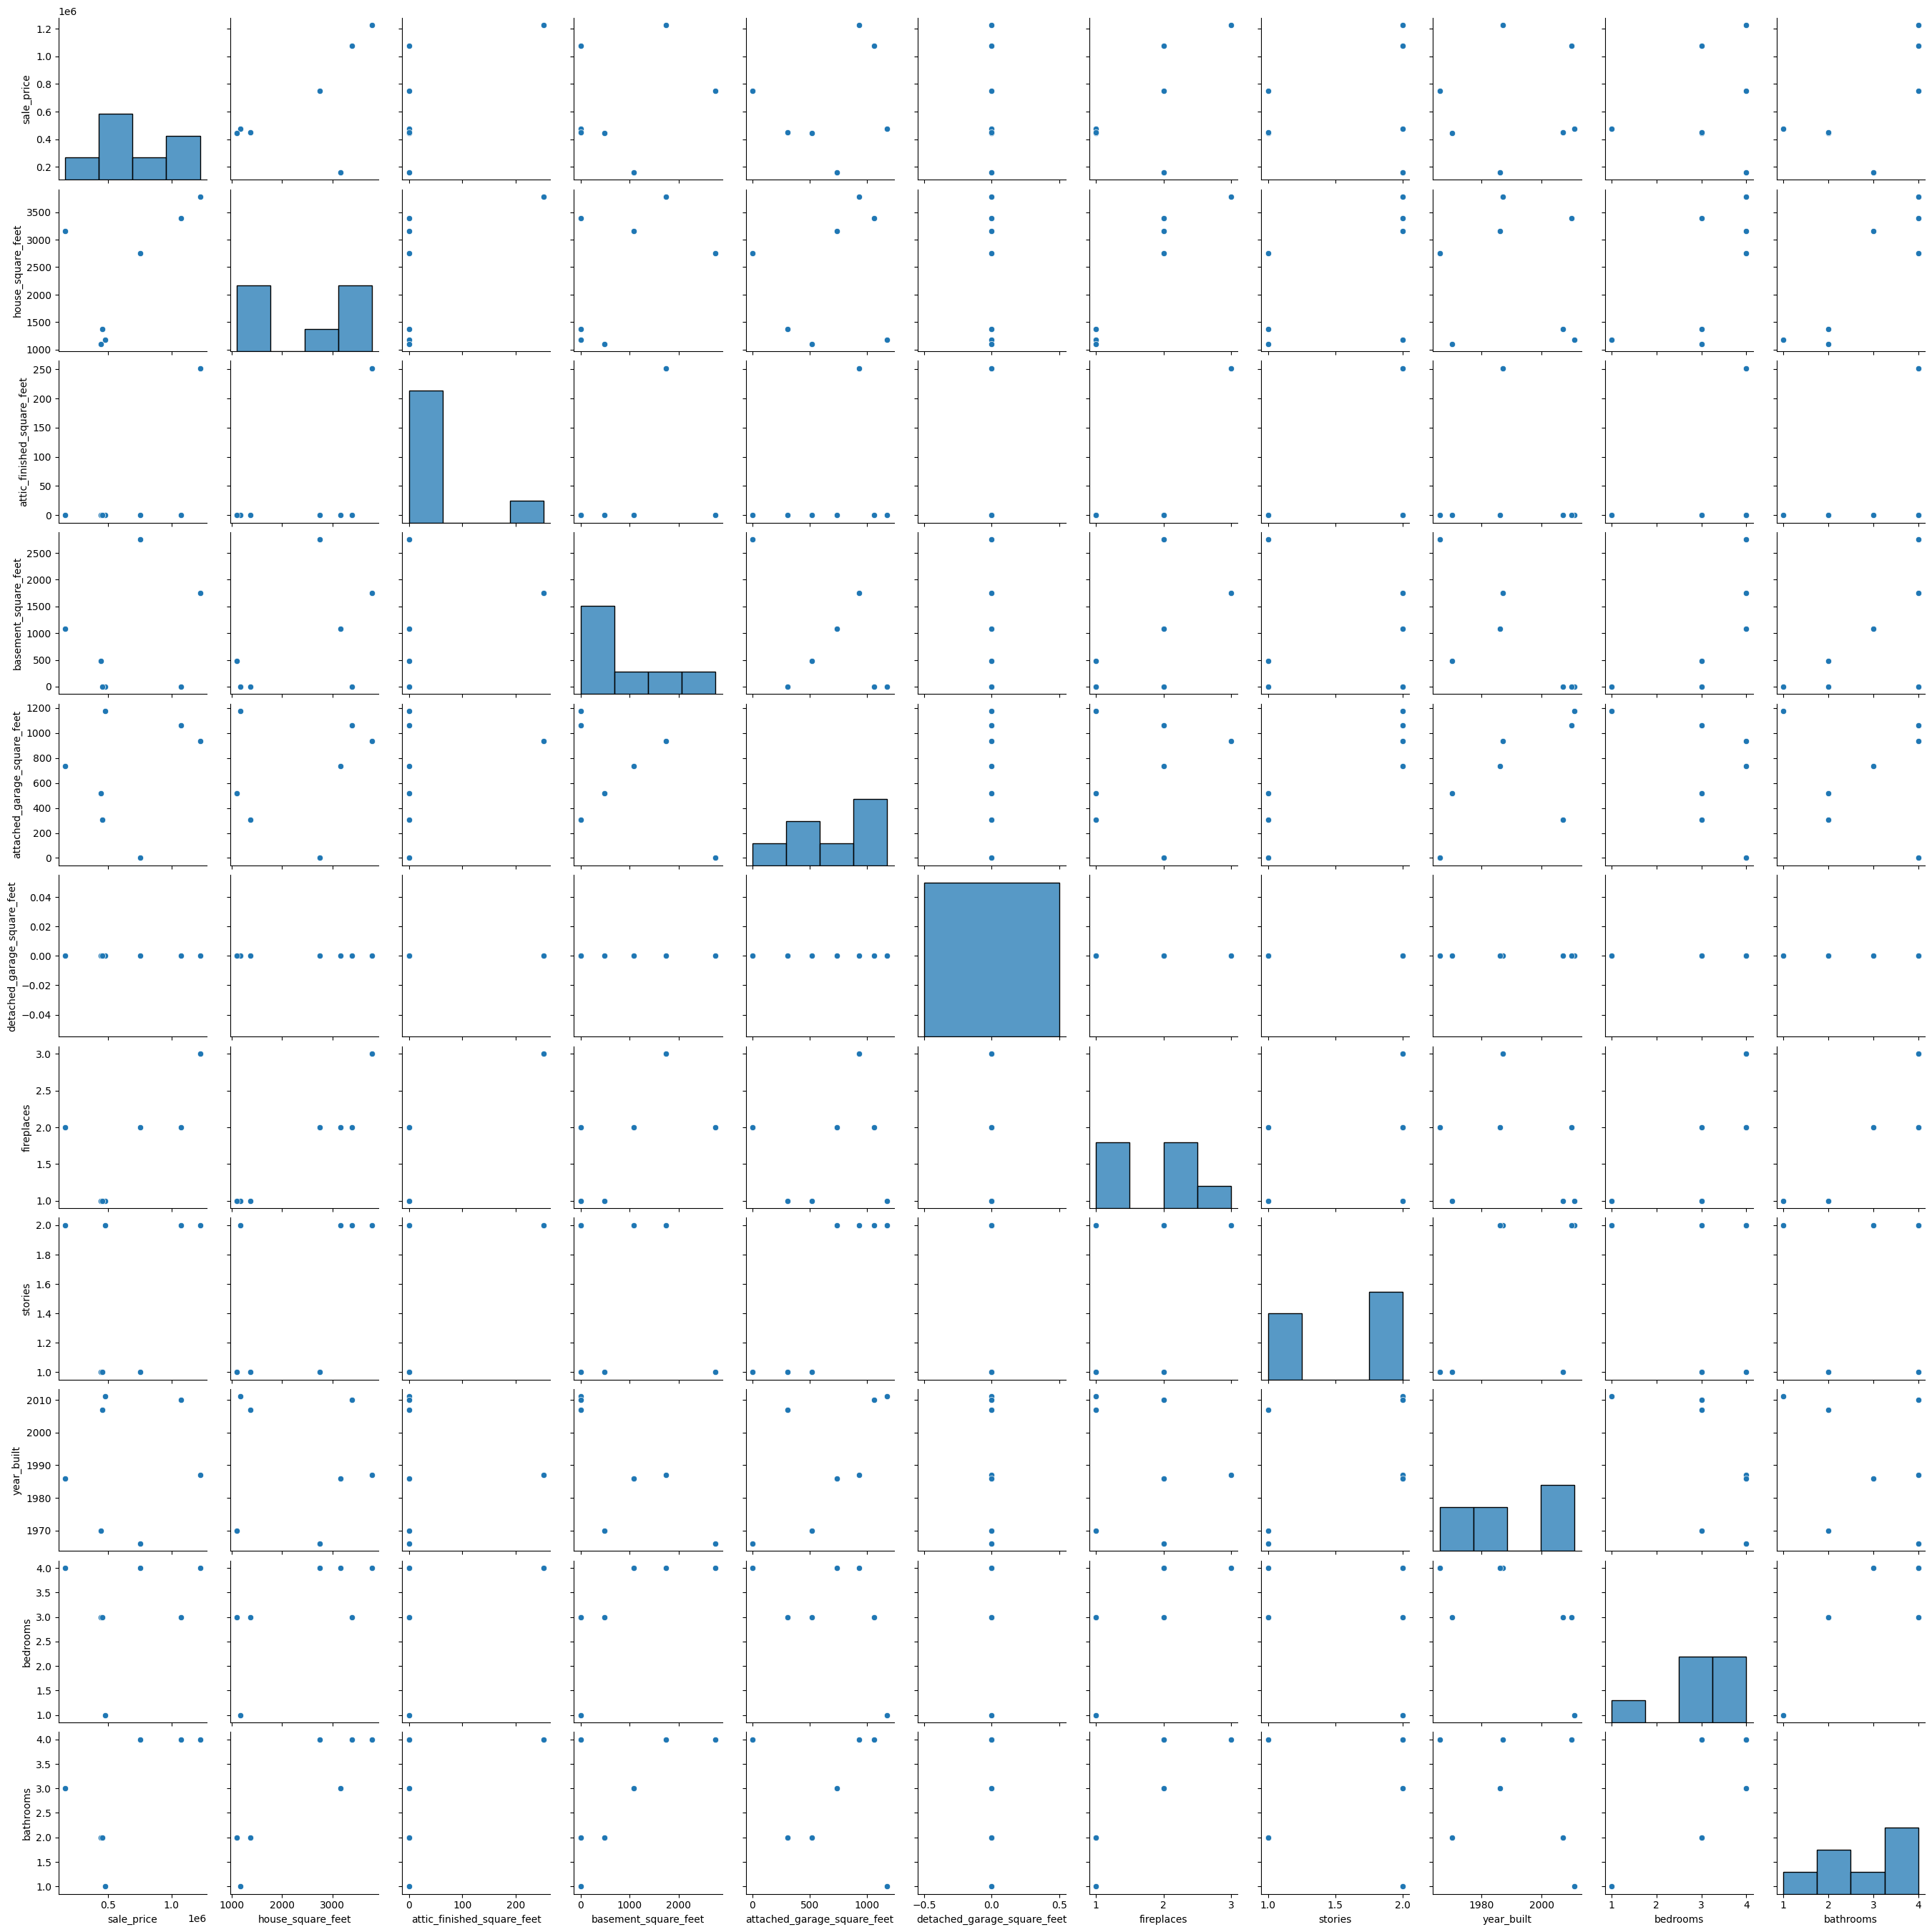

Simple Linear Model
Train RMSE: 8.840797528142528e-08
Test RMSE: 8827064.762628296
Train R2: 1.0
Test R2: -553.0769587458428
Polynomial Model
Train RMSE (poly): 1.3735034692802116e-09
Test RMSE (poly): 891709.1231499651
Train R2 (poly): 1.0
Test R2 (poly): -4.6543655844186995
Lasso Regularization Model
Train RMSE (Lasso): 0.676469376700958
Test RMSE (Lasso): 223614.4401692043
Train R2 (Lasso): 0.9999999999952984
Test R2 (Lasso): 0.6444201397177838
Selected features by Lasso: Index(['house_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'fireplaces', 'stories', 'year_built',
       'bedrooms', 'bathrooms', 'sale_date_2020-05-19', 'sale_date_2020-06-03',
       'sale_date_2020-12-04', 'sale_date_2020-12-22',
       'hvac_description_Forced Air', 'hvac_description_Heat Pump',
       'hvac_description_Hot Water Baseboard', 'exterior_Frame Vinyl',
       'roof_cover_Concrete Tile', 'waterfront_type_WF Stream/Creek',
       'view_quality_View Good', 'view_quality_

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Load and clean the data
data = pd.read_csv('pierce_county_house_sales.csv')

data.info()

data.head()


print(data.isnull().sum())

data.dropna(inplace=True)

# Step 2: Convert date columns if necessary
if 'date_column' in data.columns:
    data['date_column'] = pd.to_datetime(data['date_column'])  # Convert to datetime
    data['year'] = data['date_column'].dt.year
    data['month'] = data['date_column'].dt.month
    data['day'] = data['date_column'].dt.day
    data.drop('date_column', axis=1, inplace=True)  # Drop the original date column if no longer needed

data.columns = data.columns.str.strip()

# Step 3: EDA
data.describe()
sns.pairplot(data)  # Visualize pairwise relationships
plt.show()

# Step 4: Transform categorical variables
X = data.drop('sale_price', axis=1)  # Use the correct target variable name
y = data['sale_price']

X = pd.get_dummies(X, drop_first=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Simple linear model
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Simple Linear Model')
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Train R2:', r2_score(y_train, y_train_pred))
print('Test R2:', r2_score(y_test, y_test_pred))

# Step 7: Complex model (add polynomial features, etc.)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_train_poly_pred = model_poly.predict(X_train_poly)
y_test_poly_pred = model_poly.predict(X_test_poly)

print('Polynomial Model')
print('Train RMSE (poly):', np.sqrt(mean_squared_error(y_train, y_train_poly_pred)))
print('Test RMSE (poly):', np.sqrt(mean_squared_error(y_test, y_test_poly_pred)))
print('Train R2 (poly):', r2_score(y_train, y_train_poly_pred))
print('Test R2 (poly):', r2_score(y_test, y_test_poly_pred))

# Step 8: Lasso regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_lasso_pred = lasso.predict(X_train)
y_test_lasso_pred = lasso.predict(X_test)

print('Lasso Regularization Model')
print('Train RMSE (Lasso):', np.sqrt(mean_squared_error(y_train, y_train_lasso_pred)))
print('Test RMSE (Lasso):', np.sqrt(mean_squared_error(y_test, y_test_lasso_pred)))
print('Train R2 (Lasso):', r2_score(y_train, y_train_lasso_pred))
print('Test R2 (Lasso):', r2_score(y_test, y_test_lasso_pred))

selected_features = X.columns[(lasso.coef_ != 0)]
print('Selected features by Lasso:', selected_features)
